<a href="https://colab.research.google.com/github/preetham-1601/Twitter-Sentiment-Analysis-Using-Python/blob/main/Final_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tweepy
import pandas as pd
import re
import nltk

!pip install transformers
!pip install keras
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 59.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
consumer_key = "TqpIxa3G0iebgaHuChUCvcxoI"
consumer_secret = "B2n581h0WSnyeDv9ym0E28FgqP9H2JnlPoHgIp8oOQIWjjqsrj"
access_key = "1451940933805608966-LLxpsbIwVsy0vuUvP9AIYqdSjGma3a"
access_secret = "s3Pxot7tCzu77aI1YJm5GBn5FxB19MGJWKeVLa3LvHyWM"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

hashtags = ["ClemsonTigers", "ClemsonGrad", "ClemsonFamily","Clemson"]
unique_twts = set()
twt_list = []

for hashtag in hashtags:
    query = hashtag
    for page in tweepy.Cursor(api.search_tweets, q=hashtag, lang='en', tweet_mode='extended',count =100).pages(100):

        for twt in page:

            if 'retweeted_status' in dir(twt):
                twt_matter = twt.retweeted_status.full_text
            else:
                twt_matter = twt.full_text

            twt_matter = re.sub(r"(#[\d\w]+)|(http\S+)", "", twt_matter).strip()

            if twt_matter not in unique_twts:
                unique_twts.add(twt_matter)

                twt_list.append({
                    'content': twt_matter,
                    'hashtag': hashtag,
                    'timestamp': twt.created_at})

df = pd.DataFrame(twt_list)
df.head()
df.to_csv('clem_tw.csv', index=False)

In [ ]:
df.head()

,content,hashtag,timestamp
0,𝐓𝐈𝐆𝐄𝐑𝐒 𝐖𝐈𝐍!! 🐅🔥\n\n defeats No. 22 Louisville ...,ClemsonTigers,2023-05-07 01:52:36+00:00
1,.@ClemsonBaseball is heatin' up!\n\nThe Tigers...,ClemsonTigers,2023-05-07 01:26:19+00:00
2,Our @ClemsonBaseball beats to @LouisvilleBSB 4...,ClemsonTigers,2023-05-07 01:03:30+00:00
3,@MMyrick29 @ClemsonBaseball @LouisvilleBSB @Ti...,ClemsonTigers,2023-05-07 01:02:48+00:00
4,Just five days after making season tickets ava...,ClemsonTigers,2023-05-06 23:06:10+00:00


In [ ]:
df.to_csv('clem_tw.csv')

In [ ]:
df = pd.read_csv('clem_tw.csv')
fst_3000_tweets = df.head(3000)
fst_3000_tweets.to_csv('fst_3k_tweets.csv', index=False)

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer



df = pd.read_csv('fst_3k_tweets.csv')


def preprocess_text(text):

    text = text.lower()

    text = re.sub(r"http\S+", "", text)

    text = re.sub(r"@\S+", "", text)

    text = re.sub(r"#\S+", "", text)

    text = re.sub(r'[^\w\s]','',text)

    words = nltk.word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    text = ' '.join(words)
    return text


df['Processed_twts'] = df['content'].apply(preprocess_text)



df.to_csv('preproc_tws.csv', index=False)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from numpy import void
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vecr = CountVectorizer()
vecr.fit(df['Processed_twts'])
vo = vecr.vocabulary_
print(vo)
print(len(vo))

bag_of_words = vecr.transform(df['Processed_twts'])
print(bag_of_words)

matrix=bag_of_words.toarray()
print(matrix)

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df['Processed_twts'])
print('TF-IDF matrix:', tfidf_matrix.toarray())

{'home': 3164, 's𝐖eet': 5926, 'tiger': 6103, 'defeat': 2015, '22': 236, 'louisville': 3825, 'friday': 2782, 'take': 5945, 'game': 2832, 'story': 5803, 'field': 2627, 'go': 2900, 'beat': 1034, '63': 445, 'amp': 729, 'series': 5436, '𝐂𝐋𝐈𝐍𝐂𝐇𝐄𝐃': 6791, '15th': 113, 'year': 6755, 'row': 5250, 'bc': 1021, '𝙏𝙞𝙜𝙚𝙧𝙨': 6823, 'five': 2669, 'day': 1964, 'making': 3895, 'season': 5379, 'ticket': 6098, 'available': 905, 'inaugural': 3296, 'yall': 6746, 'already': 702, 'purchased': 4876, '1000': 14, 'clemson': 1570, 'fan': 2565, 'unmatched': 6378, 'got': 2927, 'past': 4547, 'week': 6582, 'freshman': 2778, 'guard': 2989, 'great': 2955, 'lateral': 3646, 'movement': 4137, 'power': 4739, 'behind': 1061, 'every': 2460, 'punch': 4870, 'first': 2662, 'visit': 6494, 'beautiful': 1039, 'stadium': 5726, 'campus': 1376, 'enjoying': 2390, 'play': 4670, 'one': 4405, 'indiana': 3315, 'best': 1091, 'looking': 3799, 'forward': 2746, 'weekend': 6583, 'sigh': 5527, 'here': 3111, '18': 130, 'line': 3745, 'today': 6125,

In [ ]:
from transformers import pipeline
classif=pipeline('sentiment-analysis')

senti=classif(df['Processed_twts'].tolist())
df['label']=[1 if s['label']== 'POSITIVE' else 0 for s in senti]
df.head()


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


,content,hashtag,timestamp,Processed_twts,label
0,home s𝐖eet home😎🐅\n\nThe Tigers defeat No. 22 ...,ClemsonTigers,2023-05-06 01:42:33+00:00,home s𝐖eet home tiger defeat 22 louisville fri...,0
1,What was fields doing?,ClemsonTigers,2023-05-06 01:40:33+00:00,field,1
2,@MMyrick29 @ClemsonBaseball @LouisvilleBSB @Ti...,ClemsonTigers,2023-05-06 01:18:35+00:00,go tiger,1
3,Our @ClemsonBaseball beats to @LouisvilleBSB 6...,ClemsonTigers,2023-05-06 01:18:27+00:00,beat 63 amp,1
4,SERIES 𝐂𝐋𝐈𝐍𝐂𝐇𝐄𝐃🔒\n\nFor the 1️⃣5️⃣th year in a...,ClemsonTigers,2023-05-06 01:14:03+00:00,series 𝐂𝐋𝐈𝐍𝐂𝐇𝐄𝐃 15th year row bc series go 𝙏𝙞𝙜...,0


In [ ]:
df.to_csv('labeled_tweets.csv', index=False)

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Bidirectional, Dropout, SpatialDropout1D, LSTM, Dense, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.callbacks import EarlyStopping
from keras.optimizers import RMSprop

tokenizer = Tokenizer(num_words=5000, lower=True)
tokenizer.fit_on_texts(df['Processed_twts'])
X = tokenizer.texts_to_sequences(df['Processed_twts'])
X = pad_sequences(X, maxlen=100)
y = to_categorical(df['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)





In [ ]:
model = Sequential()
model.add(Embedding(5000, 100, input_length=100))
model.add(SpatialDropout1D(0.4))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
38/38 [==============================] - 22s 431ms/step - loss: 0.6880 - accuracy: 0.5475 - val_loss: 0.6807 - val_accuracy: 0.5800
Epoch 2/10
38/38 [==============================] - 15s 410ms/step - loss: 0.6582 - accuracy: 0.6025 - val_loss: 0.6274 - val_accuracy: 0.6517
Epoch 3/10
38/38 [==============================] - 15s 390ms/step - loss: 0.5265 - accuracy: 0.7496 - val_loss: 0.6009 - val_accuracy: 0.6900
Epoch 4/10
38/38 [==============================] - 15s 398ms/step - loss: 0.3841 - accuracy: 0.8408 - val_loss: 0.6255 - val_accuracy: 0.7100
Epoch 5/10
38/38 [==============================] - 16s 415ms/step - loss: 0.3050 - accuracy: 0.8854 - val_loss: 0.7151 - val_accuracy: 0.6800
Epoch 6/10
38/38 [==============================] - 15s 396ms/step - loss: 0.2616 - accuracy: 0.9108 - val_loss: 0.7978 - val_accuracy: 0.7133
Epoch 7/10
38/38 [==============================] - 17s 445ms/step - loss: 0.2008 - accuracy: 0.9283 - val_loss: 0.7633 - val_accuracy: 0.7150

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

y_pred_prob = model.predict(X_test)

# Check if the output is a 2D array with probabilities for each class
if y_pred_prob.ndim == 2 and y_pred_prob.shape[1] > 1:
    # If yes, select the index of the class with the highest probability
    y_pred = np.argmax(y_pred_prob, axis=1)
else:
    # Otherwise, use the given threshold to make binary predictions
    y_pred = [1 if prob >= 0.5 else 0 for prob in y_pred_prob]

# Check if y_test is a multilabel-indicator format
if y_test.ndim == 2 and y_test.shape[1] > 1:
    # If yes, convert y_test to binary format
    y_test_binary = np.argmax(y_test, axis=1)
else:
    # Otherwise, use y_test directly
    y_test_binary = y_test

accuracy = accuracy_score(y_test_binary, y_pred)
precision = precision_score(y_test_binary, y_pred)
recall = recall_score(y_test_binary, y_pred)
f1 = f1_score(y_test_binary, y_pred)  # Changed variable name to avoid conflict with imported function
conf_matrix = confusion_matrix(y_test_binary, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


19/19 [==============================] - 1s 60ms/step
Accuracy: 0.7083333333333334
Precision: 0.6655737704918033
Recall: 0.7355072463768116
F1 Score: 0.6987951807228916


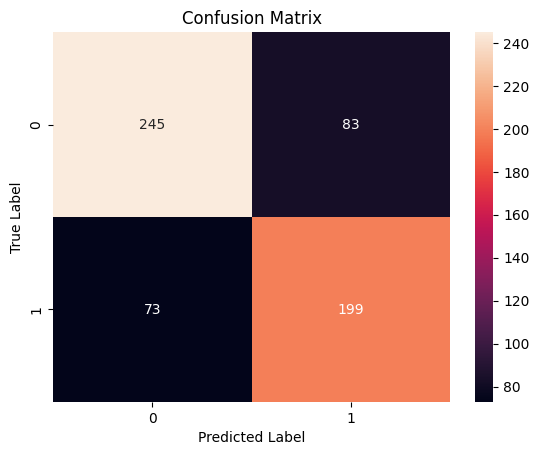

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_test_labels = np.argmax(y_test, axis=1)


c = confusion_matrix(y_test_labels, y_pred)
sns.heatmap(c, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
sentences = ["I love the new update on my phone, it's amazing! #happy",
"Just had the worst customer service experience ever. Never going back there again. #frustrated",
"The concert last night was mind-blowing! Best night of my life! #unforgettable",
"Stuck in traffic for 2 hours",
"and now I'm late for work. #annoyed",
"Everything went so wrong till the last imnute",
"This process is very bad",
"The new restaurant in town is fantastic! Their pizza is to die for! #delicious","Processes are going on and it is difficult to process","it is an auspicisous day to process in life"]
new_sequences = tokenizer.texts_to_sequences(sentences)
new_sequences_padded = pad_sequences(new_sequences, maxlen=200)


predictions = model.predict(new_sequences_padded)


for i in range(len(sentences)):
    sentiment = "Positive" if np.argmax(predictions[i]) == 1 else "Negative"
    print(sentences[i], ":", sentiment)

1/1 [==============================] - 0s 189ms/step
I love the new update on my phone, it's amazing! #happy : Positive
Just had the worst customer service experience ever. Never going back there again. #frustrated : Negative
The concert last night was mind-blowing! Best night of my life! #unforgettable : Positive
Stuck in traffic for 2 hours : Positive
and now I'm late for work. #annoyed : Positive
Everything went so wrong till the last imnute : Negative
This process is very bad : Negative
The new restaurant in town is fantastic! Their pizza is to die for! #delicious : Positive
Processes are going on and it is difficult to process : Negative
it is an auspicisous day to process in life : Positive
